# **Food Delivery Time Prediction and Analysis**

In [ ]:
# importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/Food_Delivery_Times (1).csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
df.shape

(1000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [ ]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [ ]:
df.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [ ]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Traffic_Level'] = df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])

In [ ]:
x= df['Courier_Experience_yrs'].mean()
df['Courier_Experience_yrs'].fillna(x,inplace=True)


<ipython-input-11-15a77feeb1b3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier_Experience_yrs'].fillna(x,inplace=True)


In [ ]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


In [ ]:
df.duplicated().sum()

0

# **EDA**
#**1- (univarient)**

<Axes: xlabel='Weather'>

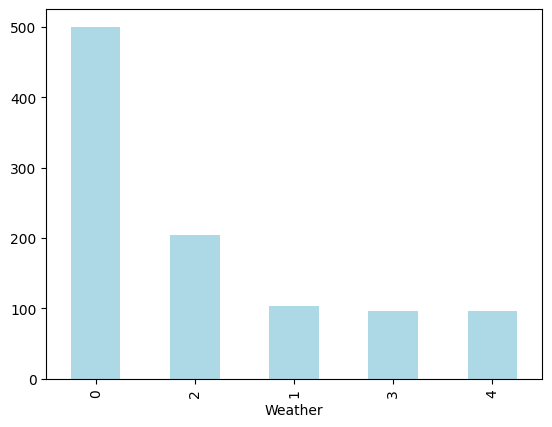

In [ ]:
df['Weather'].value_counts().plot(kind = "bar", color='lightblue')


## **Most of the weather is( Clear).**

<Axes: xlabel='Traffic_Level'>

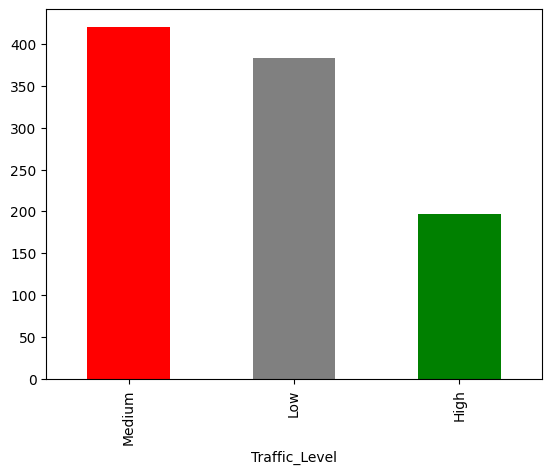

In [ ]:
df['Traffic_Level'].value_counts().plot(kind = "bar" ,color=['red', 'gray', 'green'])

**Data is distributed between low and medium congestion, with low congestion being the most common.**

<Axes: xlabel='Time_of_Day'>

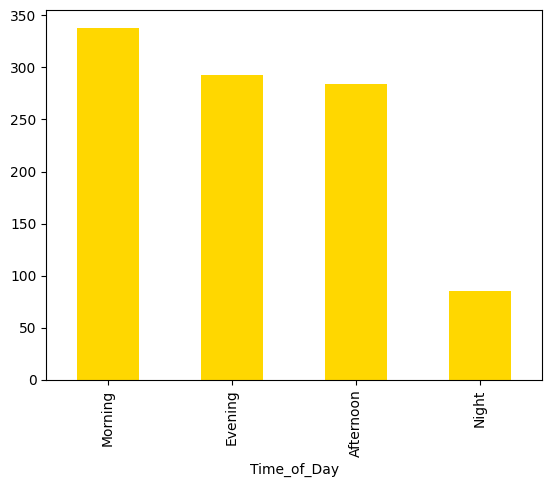

In [ ]:
df['Time_of_Day'].value_counts().plot(kind = 'bar', color=['gold'])


#### **The requests are distributed almost evenly over the different periods.**

<ipython-input-17-683c8890f4a3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['Distance_km'] ,palette='coolwarm')


<Axes: ylabel='Distance_km'>

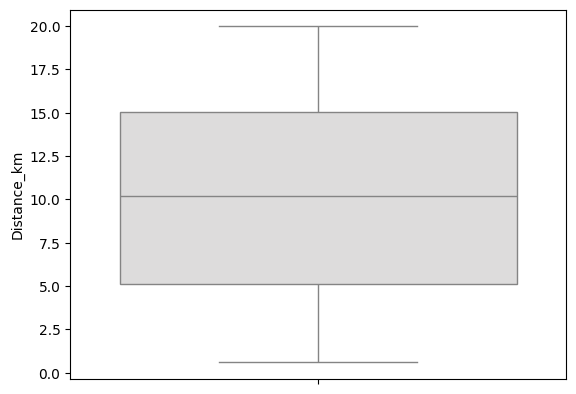

In [ ]:
sns.boxplot(df['Distance_km'] ,palette='coolwarm')

**The distribution shows most of the requests within a range of 5-15 km.**

<Axes: ylabel='Preparation_Time_min'>

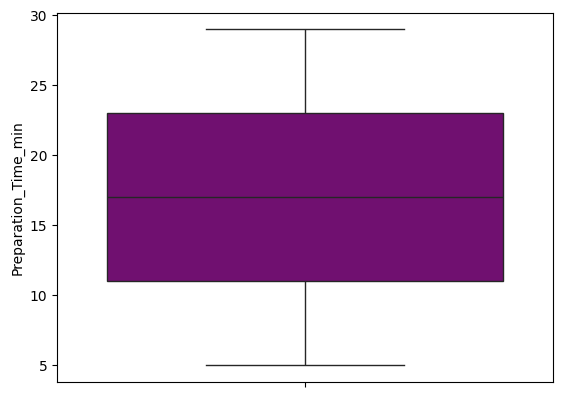

In [ ]:
sns.boxplot(df['Preparation_Time_min'], color= 'purple')


**Preparation time varies greatly, with many concentrating in under 20 minutes.**

<ipython-input-19-74e58fb8493c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['Courier_Experience_yrs'] ,palette=['#FF5733', '#33FF57', '#3357FF']);
<ipython-input-19-74e58fb8493c>:1: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(df['Courier_Experience_yrs'] ,palette=['#FF5733', '#33FF57', '#3357FF']);


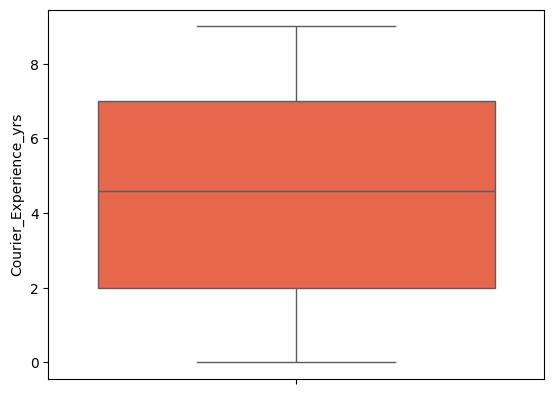

In [ ]:
sns.boxplot(df['Courier_Experience_yrs'] ,palette=['#FF5733', '#33FF57', '#3357FF']);

**Most drivers have less than 5 years experience.**

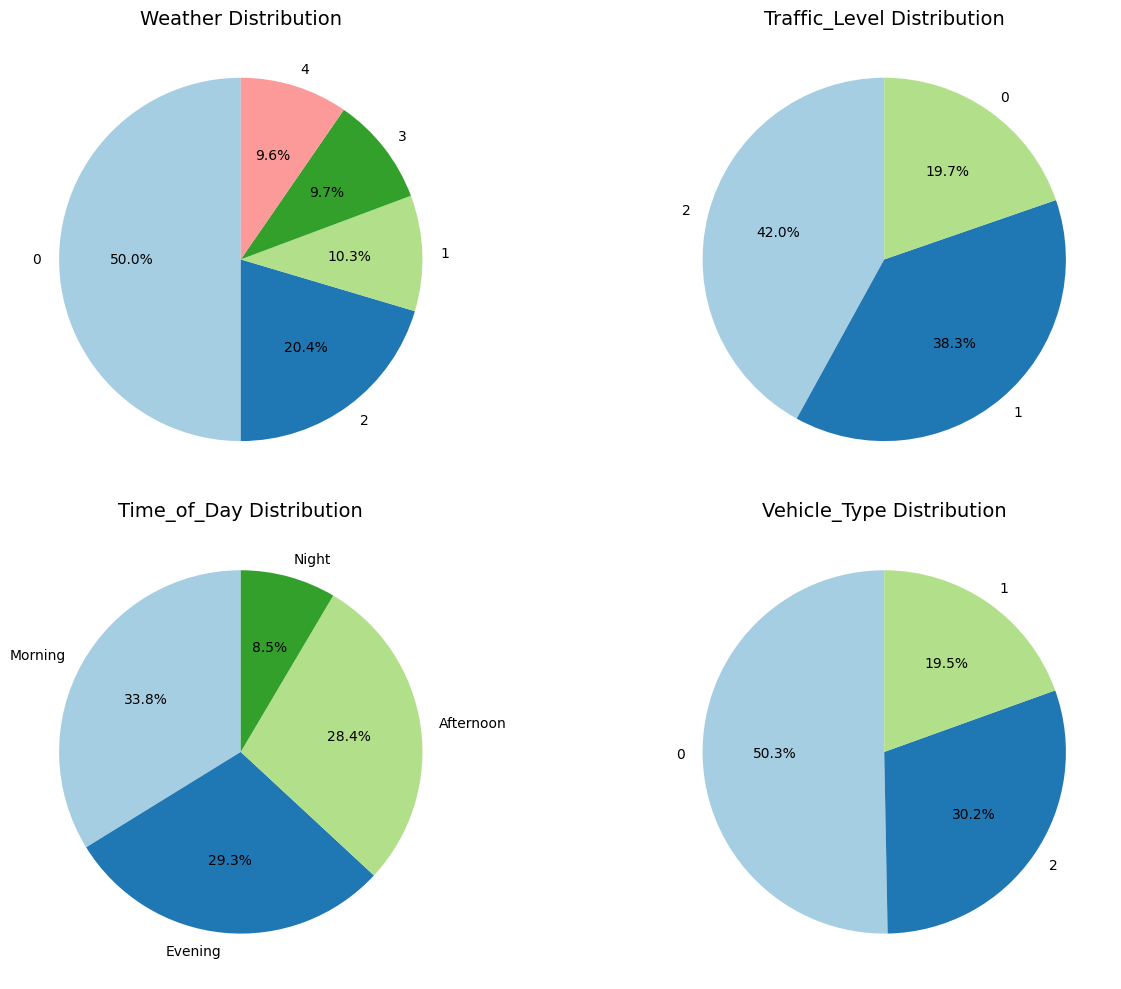

In [ ]:
# List of categorical columns for pie charts
categorical_columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

# Create pie charts for each categorical column
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    values = df[column].value_counts()
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axes[i].set_title(f'{column} Distribution', fontsize=14)

plt.tight_layout()
plt.show()

#**2- Bivarient**

<ipython-input-21-ec1577ade692>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather', y='Delivery_Time_min', data=df , palette='Set2')


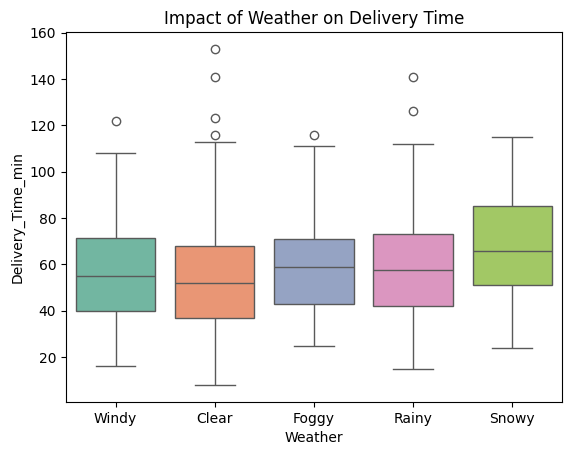

In [ ]:
sns.boxplot(x='Weather', y='Delivery_Time_min', data=df , palette='Set2')
plt.title("Impact of Weather on Delivery Time")
plt.show()


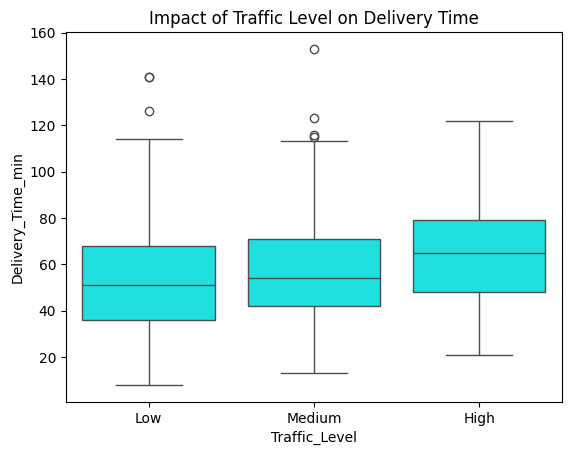

In [ ]:
sns.boxplot(x='Traffic_Level', y='Delivery_Time_min', data=df, color='cyan')
plt.title("Impact of Traffic Level on Delivery Time")
plt.show()

<ipython-input-23-35b07a0e0834>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle_Type', y='Delivery_Time_min', data=df , palette='deep')


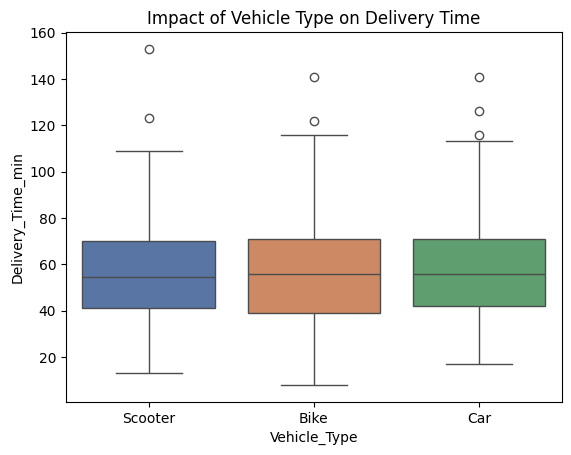

In [ ]:
sns.boxplot(x='Vehicle_Type', y='Delivery_Time_min', data=df , palette='deep')
plt.title("Impact of Vehicle Type on Delivery Time")
plt.show()

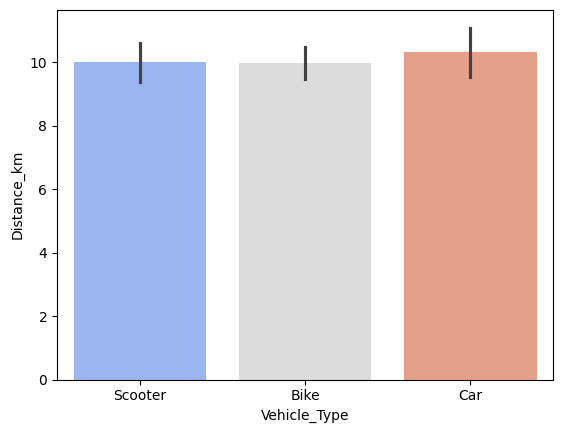

In [ ]:
sns.barplot(x = df['Vehicle_Type'],y=df['Distance_km'] ,data=df , hue = 'Vehicle_Type',palette='coolwarm');

<ipython-input-25-e187686271db>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(df["Distance_km"],color='Red',kde=True,bins=25)


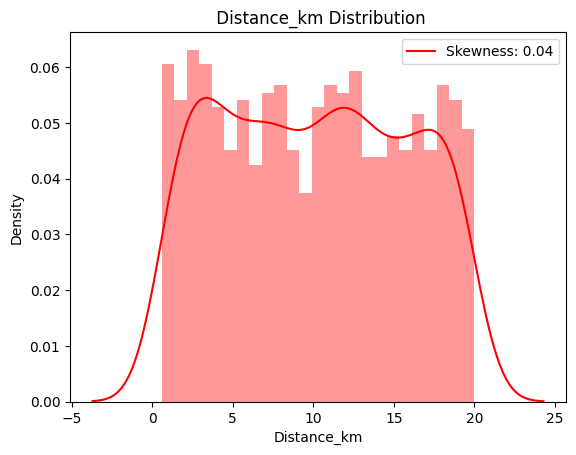

In [ ]:
bar = sns.distplot(df["Distance_km"],color='Red',kde=True,bins=25)
bar.legend(["Skewness: {:.2f}".format(df['Distance_km'].skew())])
plt.title(" Distance_km Distribution");

#**Machin Learning**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# قراءة البيانات

# التأكد من نظافة البيانات (إزالة القيم الناقصة)
df = df.dropna()

df['Weather'] = df['Weather'].astype('category').cat.codes
df['Traffic_Level'] = df['Traffic_Level'].astype('category').cat.codes
df['Vehicle_Type'] = df['Vehicle_Type'].astype('category').cat.codes

X = df[['Weather', 'Traffic_Level', 'Vehicle_Type', 'Distance_km']]  # المتغيرات المستقلة
y = df['Delivery_Time_min']  # المتغير المستهدف

# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء نموذج الانحدار الخطي
model = LinearRegression()

# تدريب النموذج
model.fit(X_train, y_train)

# توقع القيم لمجموعة الاختبار
y_pred = model.predict(X_test)

# تقييم الأداء
mse = mean_squared_error(y_test, y_pred)  # متوسط مربع الخطأ
r2 = r2_score(y_test, y_pred)  # معامل التحديد

# عرض النتائج
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# عرض المعاملات (Coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)





Mean Squared Error (MSE): 150.4112197528693
R-squared (R2): 0.6644306832428608
         Feature  Coefficient
0        Weather     1.276292
1  Traffic_Level    -1.633788
2   Vehicle_Type    -0.550671
3    Distance_km     2.992732
